In [89]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import collections
import os

### 1. Load the data

Since I already found and cleaned the data, I will load it into Python as a dataframe then convert it over to a networkx graph object...

Special thanks to this thread for helping me find it


[https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx](https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx)

First, we load the data and check it

In [9]:
f = pd.read_csv("movie_metadata.csv", sep=',')
f.head()

second we make a unique dataframe for actors and genders

In [68]:
f_1 = f[['actor_1_name','Actor One Gender']]
f_2 = f[['actor_2_name','Actor Two Gender']]
f_key = pd.concat([f_1, f_2], ignore_index=True)
f_key = f_key.drop_duplicates()
f_key.reset_index(inplace=True)

f_key = f_key.rename(columns = {'Actor One Gender':'gender'})

f_key = f_key[['actor_1_name','gender']]


f_key = f_key.loc[~f_key['gender'].isna()]

In [79]:
f_key= dict(zip(f_key.actor_1_name, f_key.gender))

Then we convert it to a networkx graph

In [80]:
G = nx.convert_matrix.from_pandas_edgelist(f,source='actor_1_name', target='actor_2_name')

nx.set_node_attributes(G, f_key, 'gender')

Check to see if it worked

In [81]:
nx.get_node_attributes(G,'gender')

{'Christoph Waltz': 'female',
 'Tom Hardy': 'male',
 'Christian Bale': 'female',
 'Brad Garrett': 'male',
 'Donna Murphy': 'male',
 'Chris Hemsworth': 'male',
 'Robert Downey Jr.': 'male',
 'Alan Rickman': 'male',
 'Daniel Radcliffe': 'male',
 'Henry Cavill': 'male',
 'Kevin Spacey': 'male',
 'Marlon Brando': 'female',
 'Giancarlo Giannini': 'male',
 'Johnny Depp': 'male',
 'Christopher Meloni': 'female',
 'Peter Dinklage': 'male',
 'Sam Claflin': 'female',
 'Will Smith': 'male',
 'Michael Stuhlbarg': 'female',
 'Emma Stone': 'female',
 'Andrew Garfield': 'female',
 'Mark Addy': 'female',
 'William Hurt': 'male',
 'Christopher Lee': 'female',
 'Eva Green': 'male',
 'Naomi Watts': 'male',
 'Thomas Kretschmann': 'male',
 'Leonardo DiCaprio': 'male',
 'Kate Winslet': 'male',
 'Scarlett Johansson': 'male',
 'Bryce Dallas Howard': 'male',
 'Judy Greer': 'male',
 'Albert Finney': 'female',
 'Hugh Jackman': 'male',
 'Kelsey Grammer': 'male',
 'Jeff Bridges': 'male',
 'Olivia Wilde': 'female',

And now let's take a look at the count

(array([185.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

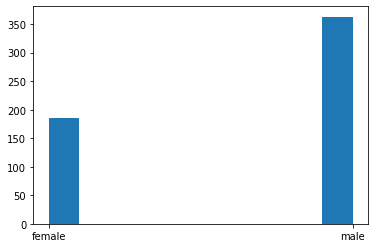

In [86]:
node_gender = list(nx.get_node_attributes(G,'gender').values())
plt.hist(node_gender)

We can see that there are significant more males than females. Let's take a look at the network graph. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


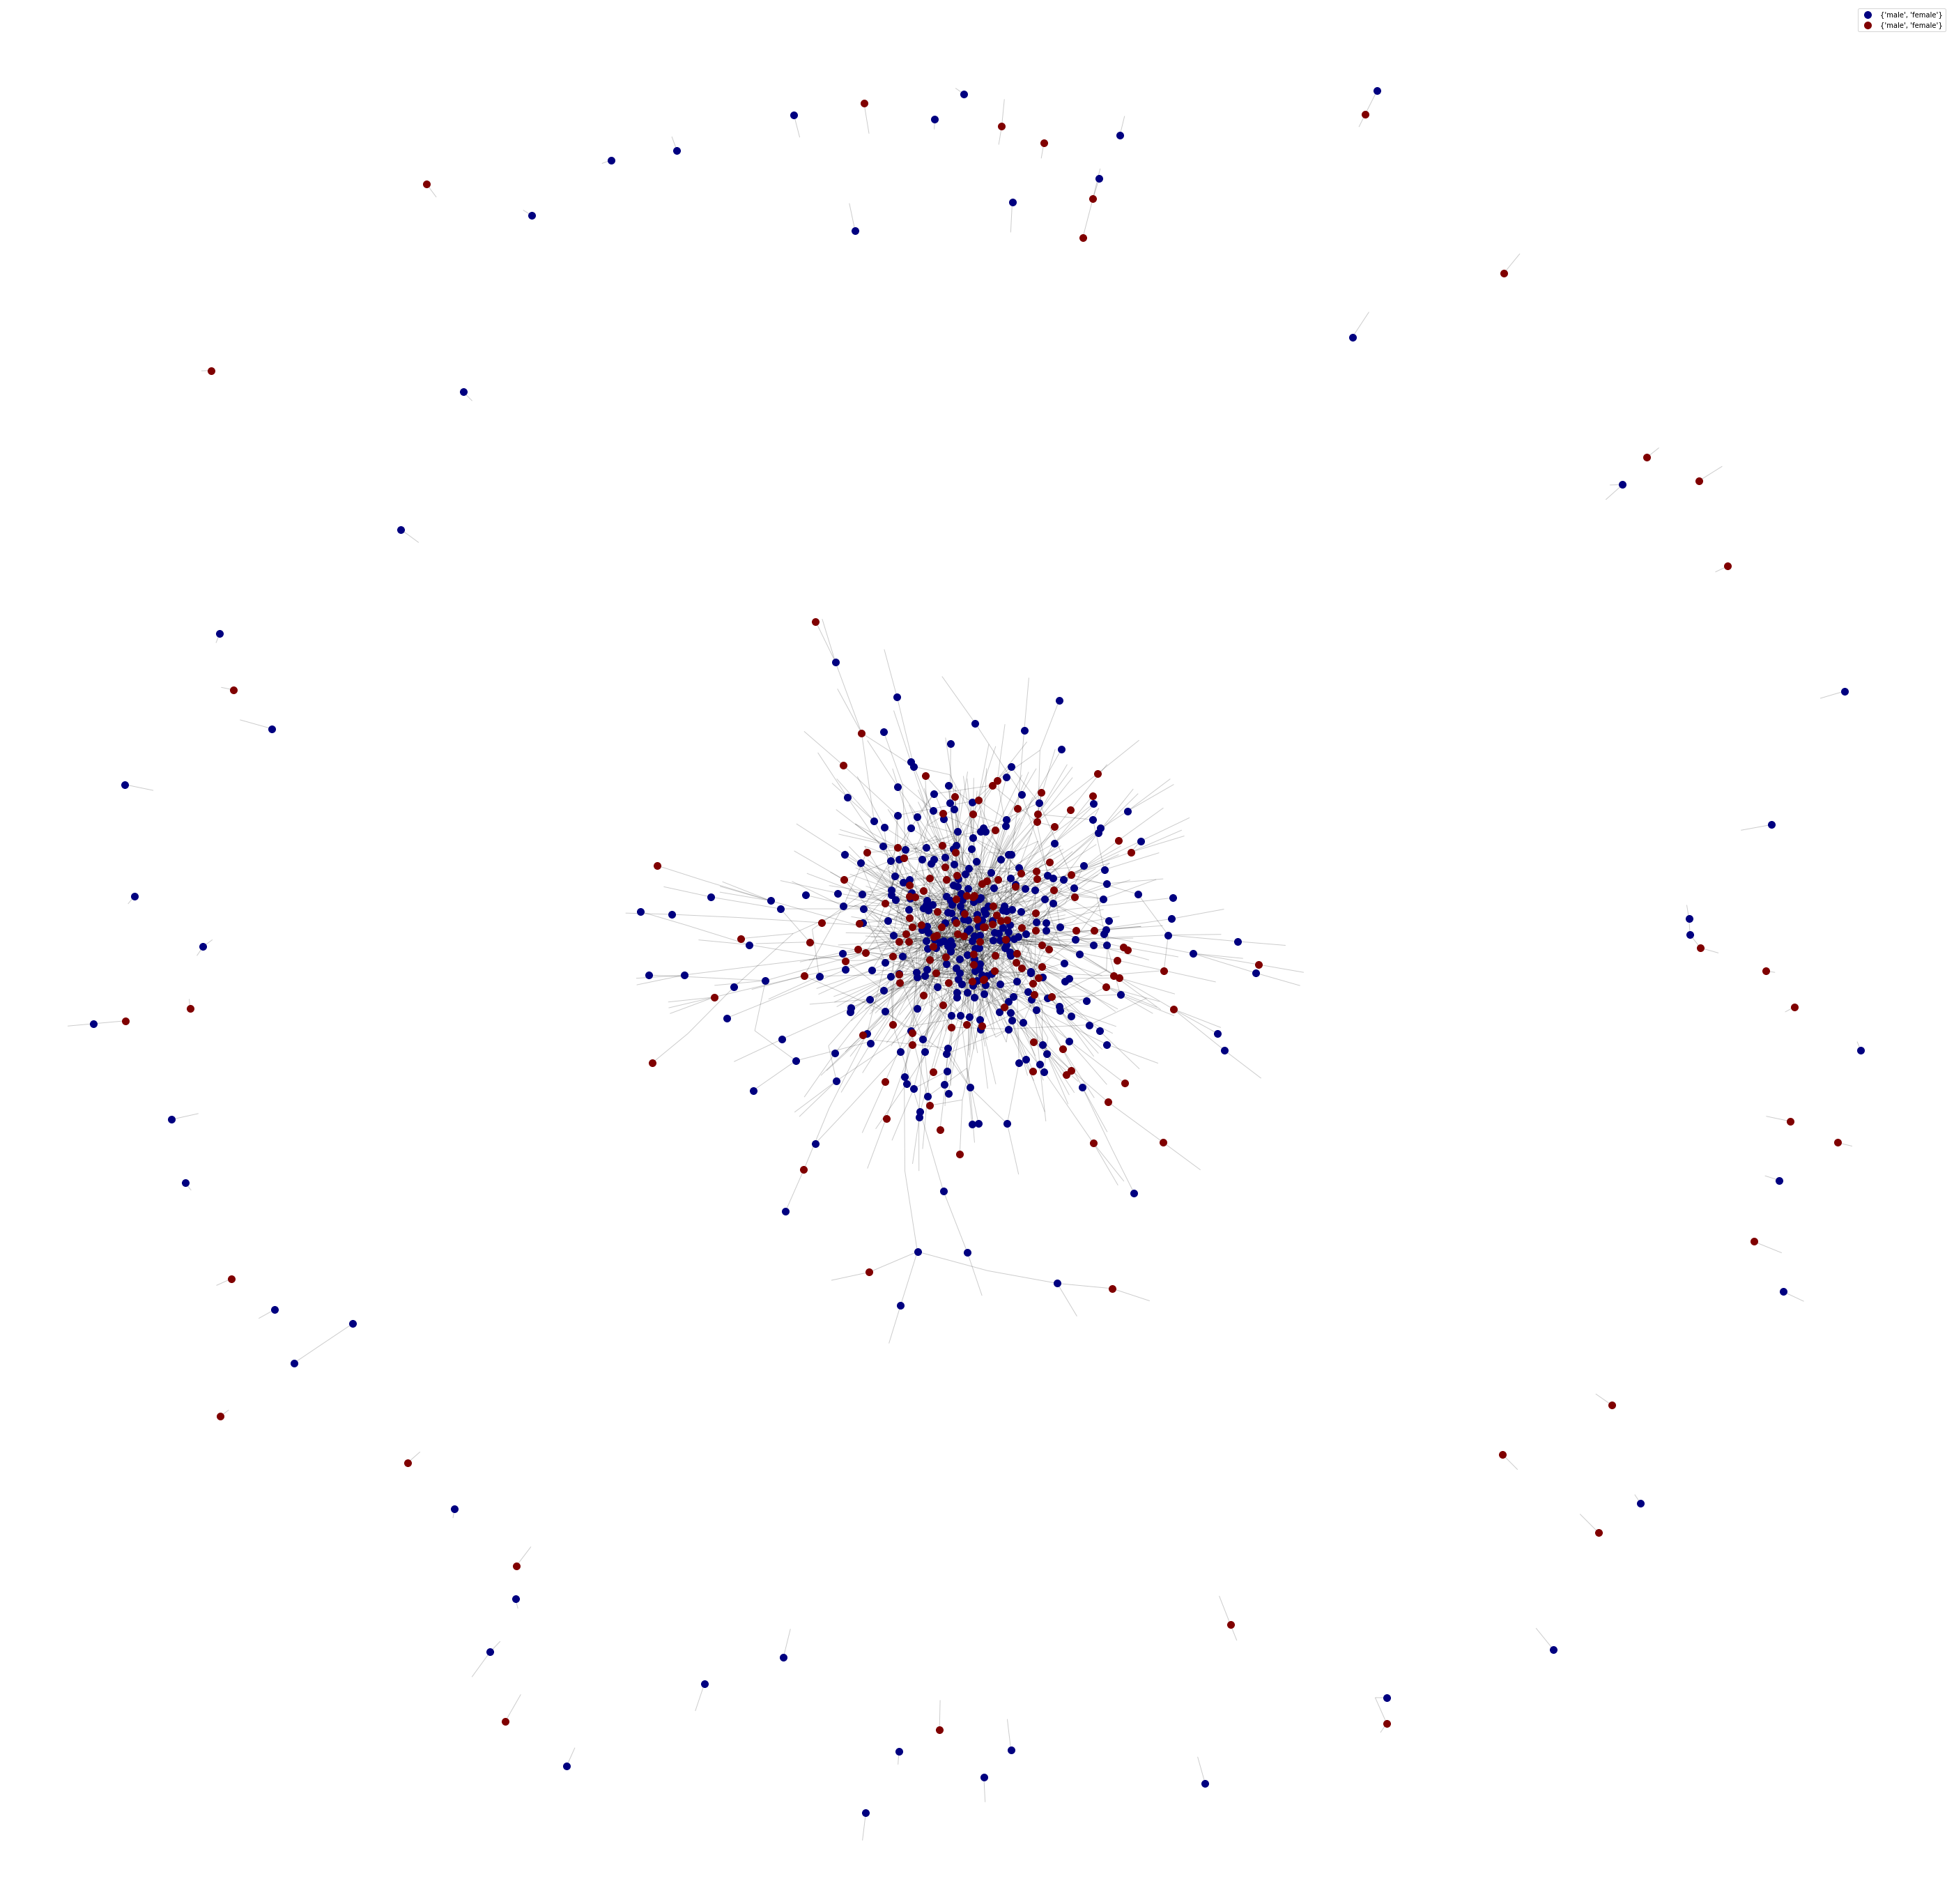

In [114]:
plt.figure(figsize=(50,50))
gender = set(node_gender)
gender_dict = nx.get_node_attributes(G,'gender')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(gender))]
pos = nx.spring_layout(G)

for i, gen in enumerate(gender):
    gen_nodes = [node for node, value in gender_dict.items() if value == gen]
    nx.draw_networkx_nodes(G, pos, nodelist=gen_nodes, node_color=colors[i], label=gender, node_size=100, cmap=plt.cm.jet)
    
nx.draw_networkx_edges(G, pos, alpha=.2)
    
plt.legend()
plt.axis('off')
plt.show()

Thanks to:
    [https://stackoverflow.com/questions/28910766/python-networkx-set-node-color-automatically-based-on-number-of-attribute-opt](https://stackoverflow.com/questions/28910766/python-networkx-set-node-color-automatically-based-on-number-of-attribute-opt)
and Mridul Seth for his work in Networkx [https://mriduls.com/](https://mriduls.com/)



Now let's get the Degree Centrality

### Degree Centrality

Let's create a quick dataframe with a list of the movie stars and their degree of centrality

In [127]:
(pd.DataFrame(list(nx.degree(G)))).sort_values(1, ascending = False)

,0,1
16,Johnny Depp,26
176,Denzel Washington,22
178,Will Ferrell,20
154,Matt Damon,20
104,Liam Neeson,20
...,...,...
697,Charlotte Le Bon,1
696,Manish Dayal,1
695,Eric Lloyd,1
225,Roy Scheider,1


Looks Like Johnny Depp is the most popular with 26 number of degrees, and several people have 1, which is the lowest number of degrees